# Proyecto de Ciencia de Datos - Análisis y predicción de ventas de Super Store

## Descripción del Proyecto

Este proyecto tiene como objetivo realizar un análisis de datos relacionados con ventas, tipos de envío y segmentación de clientes utilizando técnicas de visualización y manipulación de datos. El conjunto de datos utilizado proviene de **Kaggle**, el dataset se enfoca en el análisis de ventas de una empresa a través de distintas regiones, categorías de productos y segmentos de clientes.

El proyecto busca generar insights que puedan ayudar a comprender mejor los factores que impactan en los beneficios por región, categoría y tipo de cliente, así como la influencia que tiene el modo de envío en la rentabilidad de la empresa.

## Descripción del Dataset

El dataset contiene información detallada sobre las transacciones comerciales de la empresa, entre las que se incluyen:

- **Ship Mode**: El tipo de envío utilizado para entregar el producto.
- **Category**: La categoría a la que pertenece el producto (como Tecnología, Muebles, etc.).
- **Segment**: El segmento de cliente al que se ha dirigido (como Consumo, Corporativo, Home Office).
- **Region**: La región geográfica donde se realizó la venta.
- **Profit**: El beneficio obtenido por cada transacción.
- Otros campos adicionales como el valor de la venta, la cantidad de productos vendidos, etc.

## Hipótesis y Preguntas de Interés

1. **¿Cuáles son las categorías de productos más rentables?**
   - Hipótesis: Algunas categorías generan más beneficios que otras.

2. **¿Cómo varían las ventas y el beneficio por región?**
   - Hipótesis: Existen regiones donde las ventas y beneficios son significativamente más altos.

3. **¿Cómo influye el descuento en las ventas y el beneficio?**
   - Hipótesis: Un mayor descuento puede reducir las ventas totales y el beneficio.

4. **¿Hay algún patrón temporal en las ventas o beneficios (por ejemplo, estacionalidad)?**
   - Hipótesis: Las ventas pueden ser más altas en ciertos meses o trimestres.

5. **¿Qué tipo de envío resulta en mayores beneficios?**
   - Hipótesis: Los tipos de envío más rápidos o costosos generan más beneficios.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [17]:
# Ruta al archivo CSV
csv_path = 'data/superstore.csv'

# Leer el archivo CSV
df = pd.read_csv(csv_path, encoding='latin1')

# Mostrar el DataFrame
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [19]:
# Contar el total de nulos en todo el DataFrame
total_nulos = df.isnull().sum()

print("\nTotal de nulos en el DataFrame:", total_nulos)


Total de nulos en el DataFrame: Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


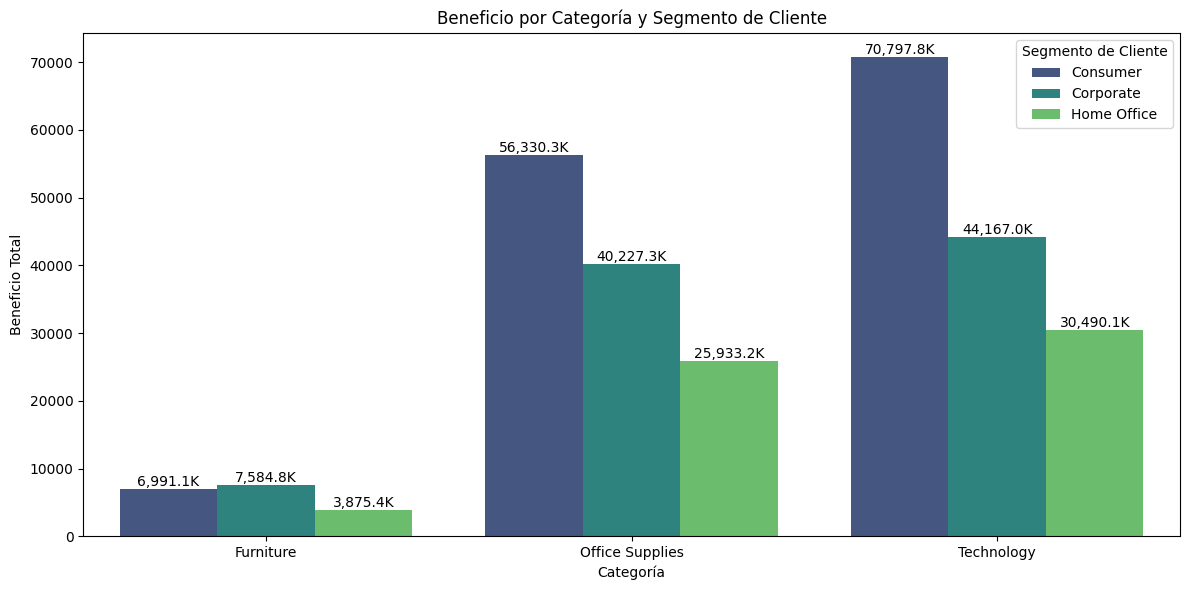

In [20]:
# Agrupar por categoría y segmento de cliente, sumando los beneficios
profit_by_category_segment = df.groupby(['Category', 'Segment'])['Profit'].sum().reset_index()

# Crear gráfico de barras apiladas
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=profit_by_category_segment, x='Category', y='Profit', hue='Segment', palette='viridis')

# Añadir etiquetas de beneficios sobre cada barra, solo si el valor es mayor que 0
for p in bar_plot.patches:
    if p.get_height() > 0:  
        bar_plot.annotate(f'{p.get_height():,.1f}K', 
                          (p.get_x() + p.get_width() / 2., p.get_height() + 1000), 
                          ha='center', va='center', fontsize=10, color='black')

# Ajustes del gráfico
plt.title('Beneficio por Categoría y Segmento de Cliente')
plt.ylabel('Beneficio Total')
plt.xlabel('Categoría')
plt.legend(title='Segmento de Cliente')
plt.xticks(rotation=0)  
plt.tight_layout()

# Mostrar el gráfico
plt.show()


1. **¿Cuáles son las categorías de productos más rentables?**
   - Hipótesis: Algunas categorías generan más beneficios que otras.

   **R:** A partir del análisis de los datos, se puede observar que la categoría de **tecnología** es la que genera los mayores beneficios en comparación con otras categorías, como **muebles** y **material de oficina**. Esta tendencia puede explicarse por varios factores clave:

   - **Margen de beneficio más alto**: Los productos tecnológicos, como ordenadores, teléfonos y dispositivos electrónicos, suelen tener márgenes de beneficio más elevados en comparación con otras categorías.
  
   - **Mayor demanda**: La tecnología es una necesidad creciente tanto para consumidores individuales como para empresas, lo que incrementa el volumen de ventas en esta categoría.

   - **Innovación constante**: La rápida innovación tecnológica genera una alta rotación de productos, lo que favorece las ventas recurrentes y, en consecuencia, mayores ingresos.

   - **Valor promedio por unidad**: Los productos de tecnología tienen un valor promedio por unidad más alto en comparación con productos de otras categorías, como muebles o material de oficina, lo que también contribuye a un mayor beneficio total.

   **Conclusión**:
   La categoría de **tecnología** es la más rentable. Esto sugiere que la empresa podría centrarse aún más en optimizar sus operaciones en esta área para maximizar los beneficios. Además, se podrían explorar estrategias para mejorar la rentabilidad de las otras categorías, como optimizar los costos o aumentar el volumen de ventas.

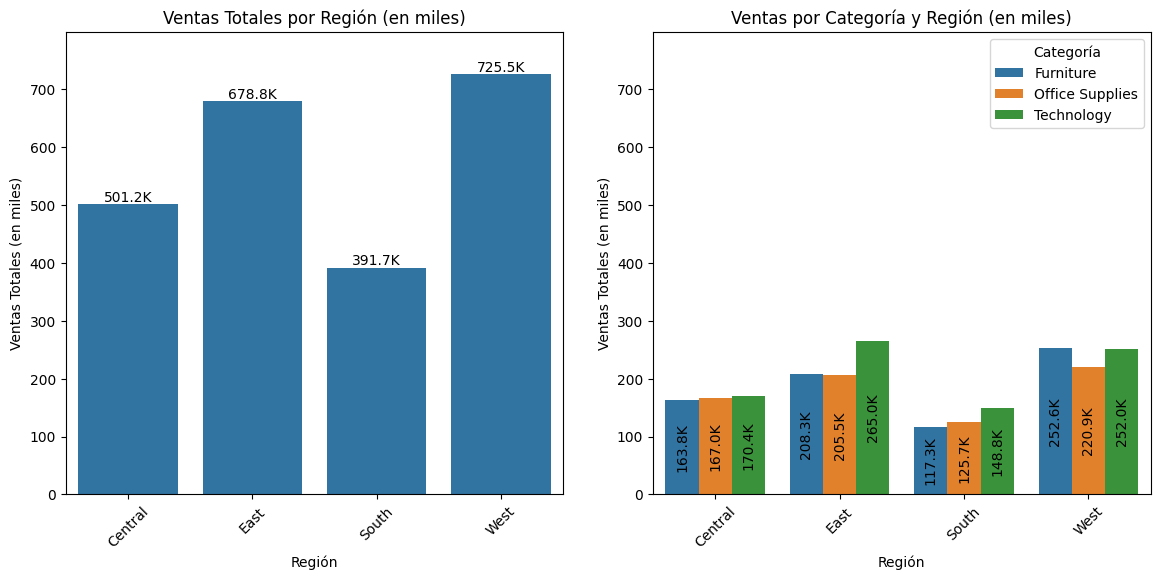

In [21]:
# Crear una figura con dos subgráficas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfico 1: Ventas Totales por Región
total_sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
total_sales_by_region['Sales'] /= 1000  # Convertir a miles
bar_plot = sns.barplot(data=total_sales_by_region, x='Region', y='Sales', ax=axes[0])

# Agregar etiquetas de ventas totales sobre cada barra
for p in bar_plot.patches:
    if p.get_height() > 0.1:  
        bar_plot.annotate(f'{p.get_height():,.1f}K', 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='bottom', fontsize=10)

axes[0].set_title('Ventas Totales por Región (en miles)')
axes[0].set_ylabel('Ventas Totales (en miles)')
axes[0].set_xlabel('Región')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Ventas por Categoría y Región (con totales)
plt_data = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()
plt_data['Sales'] /= 1000  # Convertir a miles
sns.barplot(data=plt_data, x='Region', y='Sales', hue='Category', ax=axes[1], errorbar=None)

# Agregar etiquetas de ventas totales dentro de cada barra en el Gráfico 2
for p in axes[1].patches:
    if p.get_height() > 0.1: 
        axes[1].annotate(f'{p.get_height():,.1f}K', 
                         (p.get_x() + p.get_width() / 2., p.get_height() / 2),  # Centrar verticalmente
                         ha='center', va='center', fontsize=10, rotation=90)  # Rotar a vertical

axes[1].set_title('Ventas por Categoría y Región (en miles)')
axes[1].set_ylabel('Ventas Totales (en miles)')
axes[1].set_xlabel('Región')
axes[1].legend(title='Categoría')
axes[1].tick_params(axis='x', rotation=45)

# Ajustar el límite del eje y para que ambos gráficos tengan la misma escala
max_sales = max(total_sales_by_region['Sales'].max(), plt_data['Sales'].max())
axes[0].set_ylim(0, max_sales * 1.1)
axes[1].set_ylim(0, max_sales * 1.1)

# Ajustar el espacio entre las subgráficas
plt.subplots_adjust(wspace=0.18)

# Mostrar los gráficos
plt.show()





2. **¿Cómo varían las ventas y el beneficio por región?**
   - Hipótesis: Existen regiones donde las ventas y beneficios son significativamente más altos.

   **R:** Al analizar los datos, se puede observar que las ventas y los beneficios varían de manera moderada entre las diferentes regiones, con una diferencia aproximada de **100,000** unidades monetarias entre ellas. Sin embargo, la mayor variación se encuentra entre las regiones **West** y **South**, lo que sugiere que estas dos áreas son las más diferenciadas en términos de rentabilidad.

   - **Región West**: Presenta los beneficios más altos en comparación con otras regiones, lo que podría ser el resultado de una mayor demanda o una mejor infraestructura de distribución y ventas.
  
   - **Región South**: Es la que muestra los beneficios más bajos, lo que podría estar vinculado a factores como menor población, menos infraestructura comercial o una competencia más fuerte.

   **Observaciones adicionales:**

   - Las diferencias entre otras regiones, como **East** y **Central**, son menos marcadas y varían en torno a los **100,000**. Esto indica que, aunque hay algunas diferencias en las ganancias por región, no son lo suficientemente grandes como para concluir que una región específica tiene una ventaja significativa sobre las demás.

   - Es importante analizar si la variación entre West y South se debe a estrategias comerciales específicas o si es una cuestión de características inherentes a las regiones (tamaño de mercado, acceso a productos, etc.).

   **Conclusión:**
   Aunque existen diferencias en las ventas y beneficios entre las regiones, la variación más significativa ocurre entre las regiones **West** y **South**, con la primera generando más beneficios. Las demás regiones presentan una variación moderada, alrededor de **100,000** unidades monetarias. Este análisis podría ayudar a identificar áreas donde las estrategias de ventas o marketing pueden necesitar ajustes para optimizar la rentabilidad en cada región.

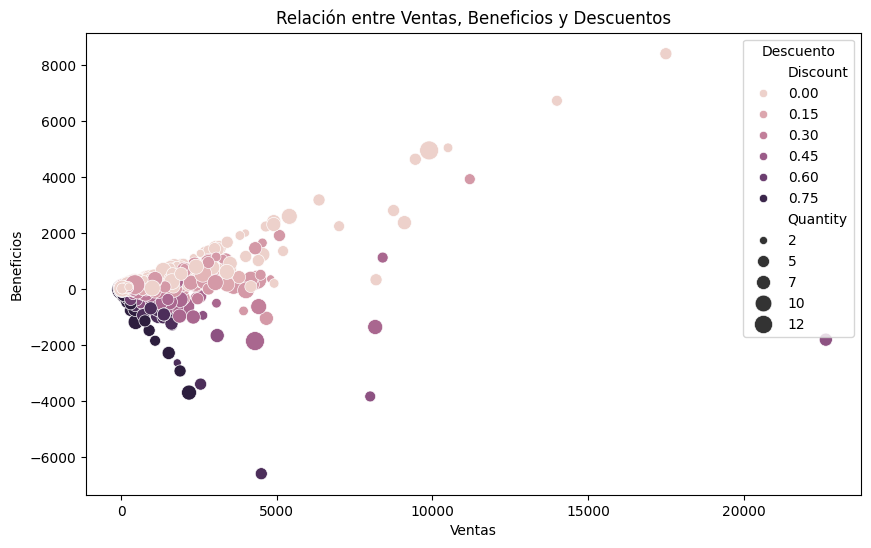

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Discount', size='Quantity', sizes=(20, 200))
plt.title('Relación entre Ventas, Beneficios y Descuentos')
plt.xlabel('Ventas')
plt.ylabel('Beneficios')
plt.legend(title='Descuento')
plt.show()



3. **¿Cómo influye el descuento en las ventas y el beneficio?**
   - Hipótesis: Un mayor descuento puede reducir las ventas totales y el beneficio.

   **R:** En general, es común que un descuento más alto pueda llevar a una reducción en el beneficio neto, y esto parece ser cierto en el caso analizado. Los datos muestran que:

   - **Descuentos elevados (45% o más)**: A partir de un **45% de descuento**, los productos no solo no generan un incremento en las ventas, sino que incluso **generan pérdidas**. Esto indica que los márgenes de beneficio se reducen tanto que ni siquiera un mayor volumen de ventas puede compensar la reducción en los ingresos.

   - **Descuentos bajos o moderados**: En el caso de descuentos más bajos, se observa lo contrario: las **ventas aumentan** y, en consecuencia, los **beneficios también aumentan**. Esto sugiere que los clientes responden positivamente a pequeños incentivos de precio sin que esto afecte de manera significativa los márgenes de beneficio.

   **Análisis adicional:**

   - **Estrategia de precios**: Los resultados sugieren que ofrecer descuentos muy altos puede ser contraproducente, ya que no solo disminuyen el margen de ganancia, sino que también pueden llevar a pérdidas. En cambio, los descuentos menores parecen ser más efectivos para generar tanto un aumento en las ventas como en el beneficio.
  
   - **Posible explicación**: Esto podría deberse a que los descuentos elevados pueden devaluar la percepción del producto o atraer a compradores menos comprometidos con la marca, mientras que descuentos pequeños mantienen el valor percibido y generan una mayor conversión de ventas.

   **Conclusión:**
   En este análisis, se confirma que **los descuentos más elevados (45% o más) generan pérdidas**, mientras que los **descuentos menores** resultan en **mayores ventas y beneficios**. Este comportamiento sugiere que la empresa debería enfocarse en descuentos moderados como estrategia para maximizar tanto las ventas como los beneficios, evitando descuentos demasiado agresivos que perjudiquen la rentabilidad.

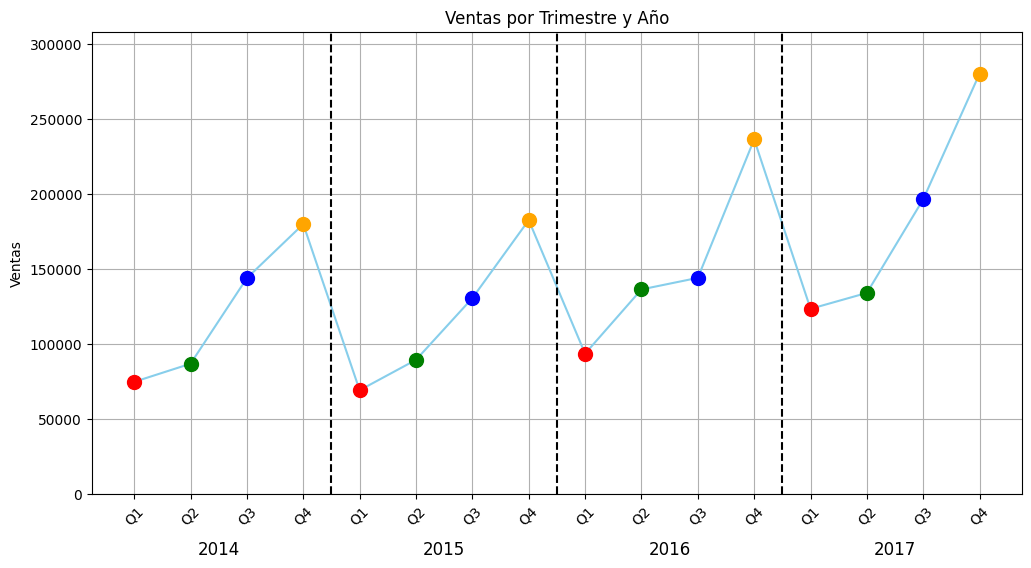

In [23]:
# Convertir la columna 'Order Date' a datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Agrupar por trimestre y año, sumando las ventas
sales_over_quarter = df.groupby(df['Order Date'].dt.to_period('Q')).agg({'Sales': 'sum'}).reset_index()

# Crear una nueva columna para mostrar el trimestre
sales_over_quarter['Quarter'] = 'Q' + sales_over_quarter['Order Date'].dt.quarter.astype(str)

# Crear una nueva columna para el año
sales_over_quarter['Year'] = sales_over_quarter['Order Date'].dt.year.astype(str)

# Crear la gráfica
plt.figure(figsize=(12, 6))

# Gráfico de líneas
plt.plot(sales_over_quarter['Quarter'] + " " + sales_over_quarter['Year'], sales_over_quarter['Sales'], color='skyblue')

# Pintar los puntos de diferentes colores
colors = {'Q1': 'red', 'Q2': 'green', 'Q3': 'blue', 'Q4': 'orange'}

for index, row in sales_over_quarter.iterrows():
    plt.scatter(row['Quarter'] + " " + row['Year'], row['Sales'], color=colors[row['Quarter']], marker='o', s=100, zorder=5)  # Asegura que los puntos estén sobre la línea

# Ajustar las etiquetas del eje x
plt.xticks(rotation=45)

# Agregar título y etiquetas
plt.title('Ventas por Trimestre y Año')
plt.ylabel('Ventas')

# Ajustar los ticks del eje x para mostrar solo los trimestres sin repetir años
xticks = sales_over_quarter['Quarter'].tolist()
plt.xticks(ticks=range(len(xticks)), labels=xticks)

# Centrar los años debajo de los Q
years = sales_over_quarter['Year'].unique()
for i, year in enumerate(years):
    plt.text(i * 4 + 1.5, -37000, year, ha='center', va='center', fontsize=12)

# Añadir líneas verticales segmentadas para separar los años
for i in range(len(years) - 1):
    plt.axvline(x=(i + 1) * 4 - 0.5, color='black', linestyle='--')

# Ajustar límites del eje Y si es necesario
plt.ylim(0, sales_over_quarter['Sales'].max() * 1.1)

plt.grid()
plt.show()


4. **¿Hay algún patrón temporal en las ventas o beneficios (por ejemplo, estacionalidad)?**
   - Hipótesis: Las ventas pueden ser más altas en ciertos meses o trimestres

   **R:** Del análisis de los datos se observa claramente un patrón de **estacionalidad** en las ventas y beneficios a lo largo de los años. Los datos muestran que:

   - **Ventas más altas en el último trimestre**: Todos los años, el **último trimestre** muestra un incremento significativo en las ventas y beneficios. Este patrón se repite consistentemente, lo que indica un comportamiento predecible en este período.

   - **Comportamiento similar trimestre a trimestre**: No solo el último trimestre es más fuerte en términos de ventas, sino que también los otros trimestres del año presentan un comportamiento bastante similar de un año a otro, mostrando comportamiento similar interanual en las ventas y beneficios en estos períodos.

   **Análisis adicional:**

   - **Posibles razones**: El aumento de las ventas en el último trimestre puede estar vinculado a eventos importantes como el **Black Friday**, **Cyber Monday**, y las compras de la temporada navideña, que impulsan la demanda y aumentan los ingresos de manera considerable.

   - **Estrategias comerciales**: Dado este patrón de estacionalidad, la empresa podría enfocar sus esfuerzos en maximizar las ventas durante el último trimestre, optimizando su inventario, campañas de marketing y promociones en función de esta demanda estacional.

   **Conclusión:**
   Existe una **clara estacionalidad** en las ventas y beneficios, con picos evidentes en el **último trimestre** de cada año. Este patrón predecible ofrece una oportunidad para que la empresa ajuste sus estrategias y recursos para aprovechar al máximo este aumento en la demanda, garantizando que el inventario y la fuerza de ventas estén alineados con los picos estacionales.

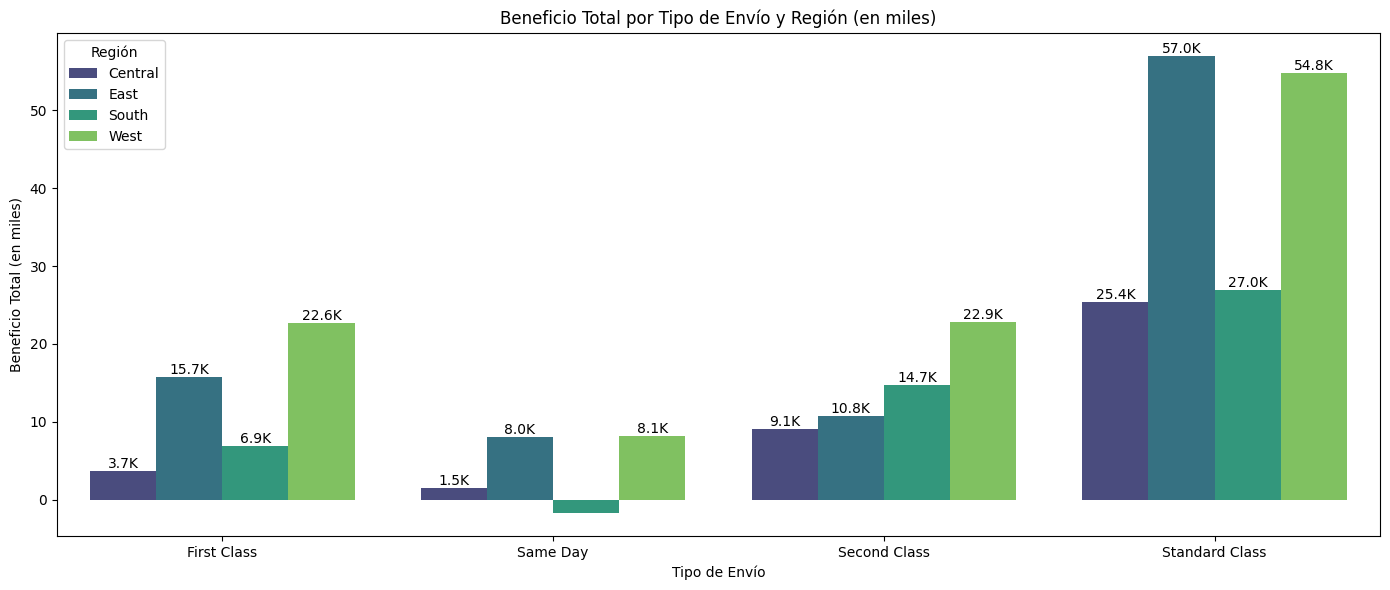

In [24]:
# Gráfico: Impacto de los tipos de envío sobre el beneficio por región
plt.figure(figsize=(14, 6))

# Agrupar por tipo de envío y región, y sumar los beneficios
profit_by_ship_mode_region = df.groupby(['Ship Mode', 'Region'])['Profit'].sum().reset_index()
profit_by_ship_mode_region['Profit'] /= 1000  # Convertir a miles

# Crear el gráfico de barras con un estilo de paleta
bar_plot = sns.barplot(data=profit_by_ship_mode_region, x='Ship Mode', y='Profit', hue='Region', palette='viridis')

# Agregar etiquetas de beneficios sobre cada barra
for p in bar_plot.patches:
    if p.get_height() > 0.1:
        bar_plot.annotate(f'{p.get_height():,.1f}K', 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='bottom', fontsize=10)

plt.title('Beneficio Total por Tipo de Envío y Región (en miles)')
plt.ylabel('Beneficio Total (en miles)')
plt.xlabel('Tipo de Envío')
plt.xticks(rotation=0) 
plt.legend(title='Región')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


5. **¿Qué tipo de envío resulta en mayores beneficios?**
   - Hipótesis: Los tipos de envío más rápidos o costosos generan más beneficios.

   R: El análisis de los datos revela que la hipótesis inicialmente planteada es incorrecta. En este caso, los envíos que generan **mayores beneficios** son aquellos que son **menos costosos**, destacándose notablemente el tipo de envío **estándar**. 

   - **Envío estándar**: Esta modalidad de envío no solo es la más económica, sino que también resulta ser la más rentable, contribuyendo significativamente a los beneficios totales de la empresa. Esto sugiere que muchos clientes optan por esta opción, lo que permite mantener un margen de beneficio favorable.

   - **Otros tipos de envío**: Por otro lado, los métodos de envío más rápidos y costosos no generan los beneficios esperados. Esto podría indicar que, a pesar de su precio elevado, no hay una demanda suficiente que justifique el costo, o que los márgenes de beneficio en estos envíos son demasiado bajos.

   **Análisis adicional:**

   - **Preferencias del consumidor**: La preferencia por el envío estándar podría estar relacionada con la percepción de los consumidores sobre el valor. Muchos pueden preferir esperar un poco más para recibir sus productos si eso significa un ahorro significativo en costos.

   - **Estrategia de precios**: La empresa podría considerar ajustar sus estrategias de marketing y precios para resaltar las ventajas del envío estándar y posiblemente reconsiderar la oferta de los métodos de envío más caros.

   **Conclusión:**
   El análisis demuestra que **los envíos menos costosos, en particular el envío estándar**, son los que resultan en mayores beneficios, desafiando la hipótesis inicial. Esto sugiere que la empresa debería centrarse en promover este tipo de envío y evaluar la efectividad de los métodos más caros para mejorar la rentabilidad.

## Modelado

El objetivo para este set de datos sera predecir las ventas o beneficios de las transacciones comerciales utilizando técnicas de modelado predictivo. Para ello, se emplearán los datos históricos, los cuales serán divididos en dos conjuntos: el 70% de los datos se utilizarán para el entrenamiento del modelo y el 30% restante se destinará a la evaluación del rendimiento del modelo.

Antes de proceder con el modelado, es fundamental realizar una limpieza de datos para eliminar posibles **outliers** que puedan afectar la precisión de las predicciones. Para identificar estos outliers, se llevará a cabo un análisis exploratorio mediante **boxplots** para variables clave como el **beneficio**, **ventas**, y **cantidad**. Esta visualización nos permitirá observar la distribución de los datos y detectar cualquier valor atípico que podría distorsionar el aprendizaje del modelo.



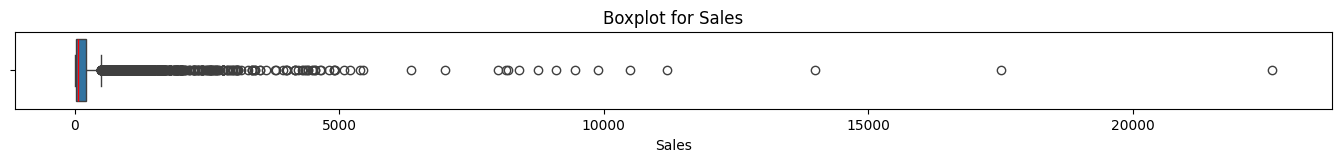

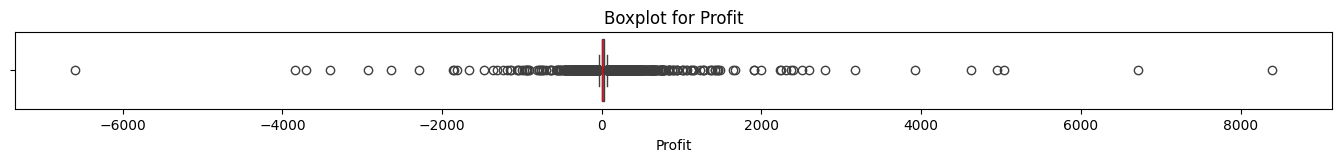

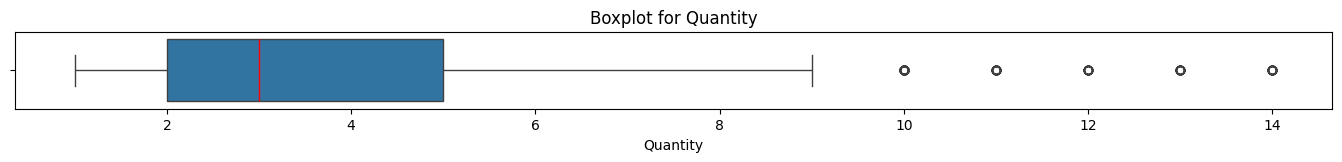

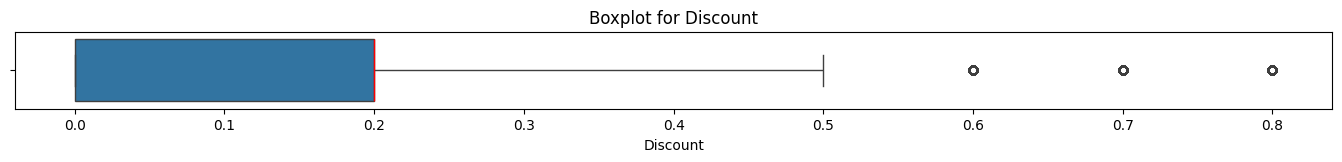

In [25]:
# Selecciona las columnas numéricas
num_cols = ['Sales', 'Profit', 'Quantity', 'Discount']

# Crea un boxplot para cada columna numérica
for col in num_cols:
    plt.figure(figsize=(17, 1))
    sns.boxplot(x=df[col], medianprops={'color': 'red'})  # Pasa una columna a la vez y cambia el color de la mediana
    plt.title(f'Boxplot for {col}')  # Añade un título para identificar la columna
    plt.show()

### Resultados del Boxplot

- **Ventas**: La presencia de outliers en las ventas sugiere que existen transacciones excepcionales que generan ingresos notablemente más altos que el promedio. Este fenómeno podría estar relacionado con la estacionalidad o promociones específicas que impulsan ciertas ventas a niveles extraordinarios.

- **Cantidad**: La baja variabilidad en las cantidades indica que los clientes tienden a comprar volúmenes similares, un patrón de compra que podría estar influido por la naturaleza del negocio y, posiblemente, por la estacionalidad en la demanda de los productos.

- **Descuento**: Los descuentos aplicados son generalmente bajos, reflejando quizás una política de precios conservadora. Sin embargo, el análisis sugiere que esta estrategia de descuento no está siendo particularmente beneficiosa, dado que los descuentos aplicados están vinculados con pérdidas en el profit. Esto sugiere una oportunidad para reevaluar la política de precios y descuentos.

- **Beneficio**: La distribución del beneficio presenta un aspecto crítico, ya que numerosos valores están por debajo de cero. Esta observación plantea la necesidad de una investigación profunda, ya que podría ser un indicio de márgenes de ganancia reducidos o costos elevados, factores que impactan negativamente en la rentabilidad general de la empresa.

#### Conclusión

Al analizar estos resultados, queda claro que factores como los outliers y la variabilidad de ciertos indicadores afectan directamente la estabilidad de métricas como el profit, lo cual respalda la elección de un modelo de predicción basado en ventas.




### Justificación de la Elección del Modelo de Predicción de Ventas sobre Profit

Optar por un modelo de predicción de **ventas** en lugar de uno basado en **profit** ofrece ventajas significativas en términos de estabilidad y aplicabilidad. A continuación, se detallan las razones que sustentan esta elección:

#### 1. Mayor Estabilidad de la Variable de Ventas
Las **ventas** son una métrica más estable y menos volátil que el **profit**. Mientras que las ventas reflejan los ingresos brutos, el profit depende de factores adicionales, como el costo de productos vendidos y descuentos, que añaden una variabilidad significativa. Al trabajar con ventas como variable objetivo, el modelo mantiene una mayor consistencia y precisión.

#### 2. Menor Dependencia de Factores Internos Variables
El profit está influenciado por factores internos (costos operativos, políticas de descuento) que suelen ser específicos de la empresa y pueden fluctuar según el contexto de mercado. Las ventas, por otro lado, se relacionan con variables externas, como la **demanda del mercado** y **preferencias de los clientes**, que suelen ser más estables y previsibles, haciendo de las ventas una métrica más manejable en modelos de predicción.

#### 3. Aplicabilidad para Estrategias de Marketing y Gestión de Inventario
Un modelo de predicción de ventas ofrece insights clave para áreas de **marketing** y **gestión de inventarios**. Esto permite a la empresa ajustar sus estrategias de manera informada, previendo cambios en la demanda y optimizando la disponibilidad de productos para satisfacer las necesidades de los clientes de manera eficiente.

#### 4. Facilita la Predicción de Demanda y Planeación de Producción
Con un enfoque en las ventas, el modelo se orienta a predecir la **demanda del mercado**, proporcionando una base sólida para planificar la producción, el aprovisionamiento y la distribución. Esto ayuda a mejorar la eficiencia operativa y garantiza una alineación precisa entre la oferta y la demanda.

#### 5. Simplificación del Modelo y Mejora en el Desempeño
Dado que el profit incluye múltiples variables internas, su modelado es más complejo y propenso a errores. En cambio, un modelo de ventas reduce esta complejidad, lo que facilita su implementación y optimización para un desempeño superior.

#### Conclusión
La predicción de ventas es la elección óptima para este análisis, ya que aporta estabilidad, aplicabilidad y precisión para decisiones estratégicas. Este enfoque contribuye a mejorar la capacidad de adaptación de la empresa a las condiciones del mercado, optimizando sus operaciones y respondiendo eficientemente a las demandas del entorno.




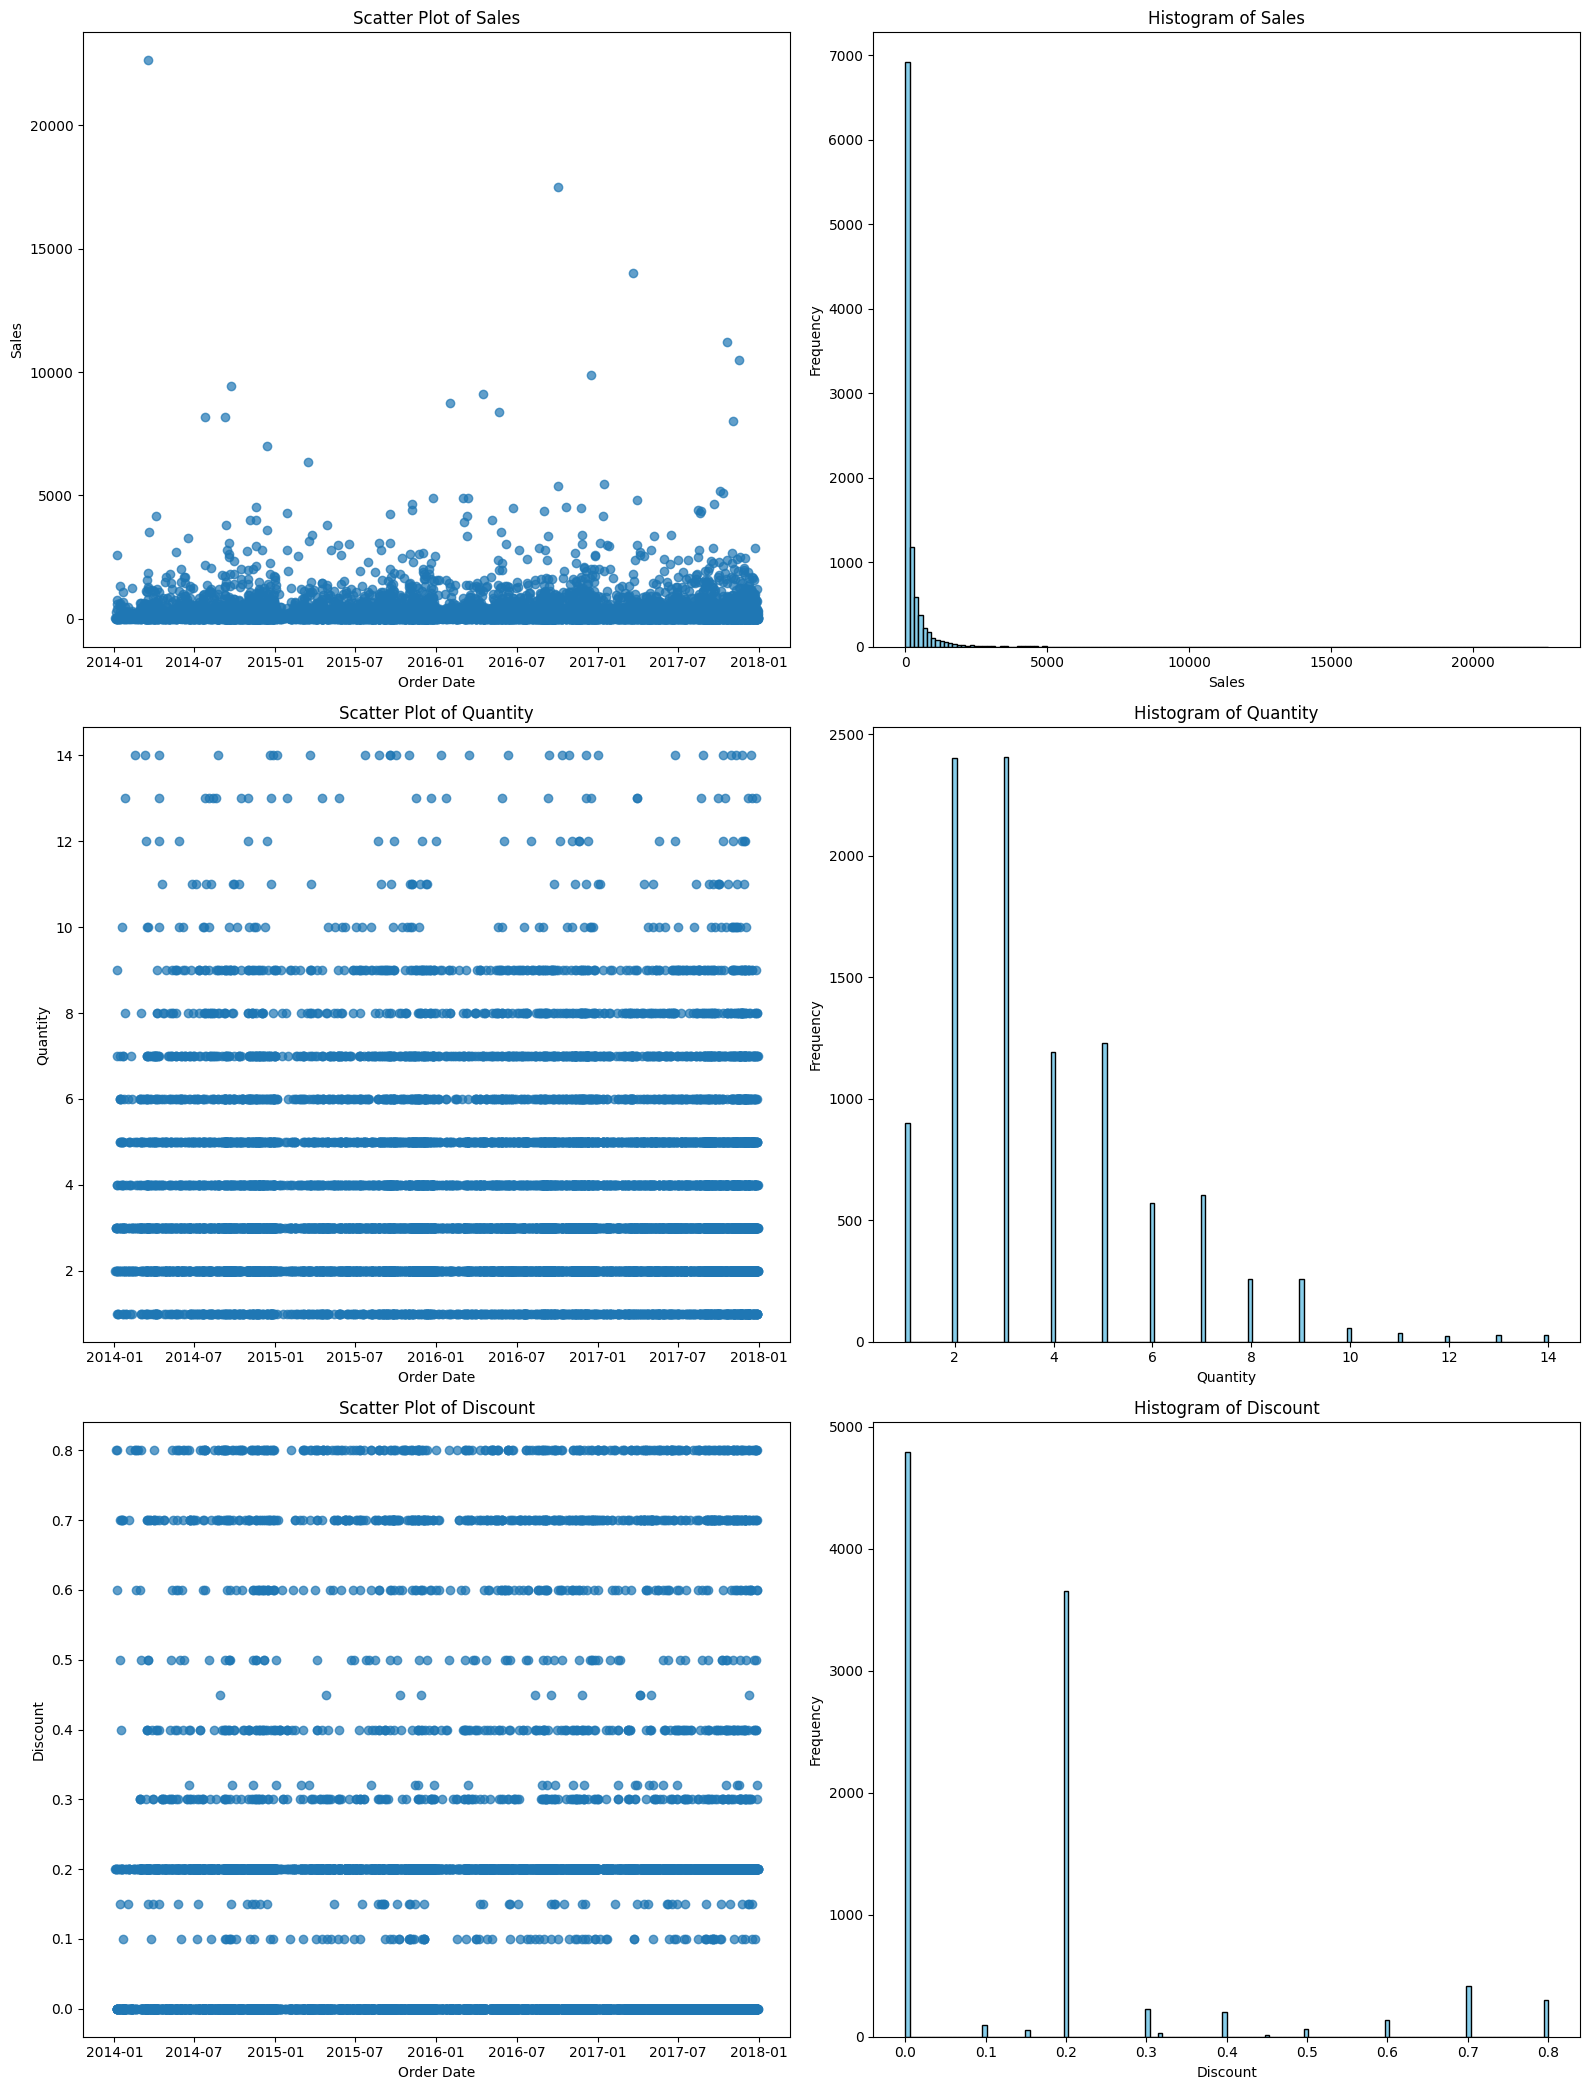

In [26]:
# Lista de columnas numéricas
num_cols = ['Sales', 'Quantity', 'Discount']

# Configura el tamaño de la figura con subplots (2 gráficos por columna)
fig, axes = plt.subplots(len(num_cols), 2, figsize=(16, 7 * len(num_cols)))

# Iterar sobre cada columna en num_cols
for i, col in enumerate(num_cols):
    # Gráfico de dispersión
    axes[i, 0].scatter(df['Order Date'], df[col], alpha=0.7)
    axes[i, 0].set_title(f'Scatter Plot of {col}')
    axes[i, 0].set_xlabel('Order Date')
    axes[i, 0].set_ylabel(col)
    
    # Histograma
    axes[i, 1].hist(df[col], bins=150, color='skyblue', edgecolor='black')
    axes[i, 1].set_title(f'Histogram of {col}')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Frequency')

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()


Antes de proceder con la eliminación de los outliers, hemos analizado la distribución de las variables numericas mas importantes en el tiempo y examinado su frecuencia en diferentes intervalos de valores. Observamos que los valores de las ventas tienden a concentrarse en un rango bajo, lo que indica que la mayoría de las transacciones generan ventas relativamente modestas. Sin embargo, también se detectan múltiples outliers que destacan en el tiempo con valores significativamente más altos de lo esperado.

Estos outliers pueden deberse a circunstancias excepcionales, como ventas puntuales con altos descuentos o pedidos inusualmente grandes, que afectan la variabilidad general de las ventas. La presencia de estos valores atípicos sugiere que, si no se tratan, podrían sesgar el modelo de predicción, reduciendo su precisión y generalización. Por lo tanto, la limpieza de estos outliers se vuelve esencial para mejorar la capacidad del modelo de capturar tendencias reales en los datos, permitiéndonos desarrollar un modelo de predicción de ventas más robusto y fiable.


In [27]:
# Seleccionar columnas numéricas
num_cols = ['Sales', 'Quantity', 'Discount']
outliers_count = {}

# Calcular y contar outliers sin filtrar todavía
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  # Correcto: calcular IQR como Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contar los outliers en cada columna
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outliers_count[col] = outliers
    print(f"Cantidad de outliers en '{col}': {outliers}")

# Filtrar el DataFrame eliminando los outliers en todas las columnas numéricas
df_cleaned = df.copy()
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  # Calcular IQR correctamente
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aplicar el filtro para cada columna
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print("Outliers eliminados y DataFrame limpio listo para su uso.")

Cantidad de outliers en 'Sales': 1167
Cantidad de outliers en 'Quantity': 170
Cantidad de outliers en 'Discount': 856
Outliers eliminados y DataFrame limpio listo para su uso.


### Detección y Limpieza de Outliers Utilizando el Rango Intercuartílico (IQR)

En este análisis, se utilizó el método del **Rango Intercuartílico (IQR)** para detectar y eliminar outliers en la columna `'Sales'`. Esta técnica se basa en el cálculo de los **cuartiles** (Q1 y Q3), que representan el 25% y el 75% de los datos, respectivamente. El **IQR** se obtiene restando Q1 de Q3, lo que permite identificar el rango intermedio donde se encuentra la mayoría de los valores.

Para determinar los outliers, se define un **límite inferior** y un **límite superior**:
- **Límite Inferior**: Calculado como \( Q1 - 1.5 \times IQR \).
- **Límite Superior**: Calculado como \( Q3 + 1.5 \times IQR \).

Cualquier valor de `'Sales'` que se encuentre fuera de estos límites es considerado un outlier. En el proceso:
1. Se identificaron los valores que superaban los límites establecidos y se calculó la cantidad total de outliers.
2. Finalmente, se filtraron estos valores atípicos, creando un nuevo DataFrame (`df_cleaned`) que solo contiene los datos de `'Sales'` dentro de los límites.

### Justificación de la Técnica IQR

El método IQR es una técnica robusta y ampliamente utilizada para la detección de outliers, ya que minimiza la influencia de valores extremos en la distribución y mantiene la integridad de los datos centrales. Al aplicar este método, el análisis se centra en los datos que reflejan la tendencia principal del conjunto, eliminando posibles distorsiones causadas por valores anómalos.

Esta técnica permite optimizar la calidad de los datos, mejorando la precisión de los análisis y modelos que se construyan a partir de ellos.


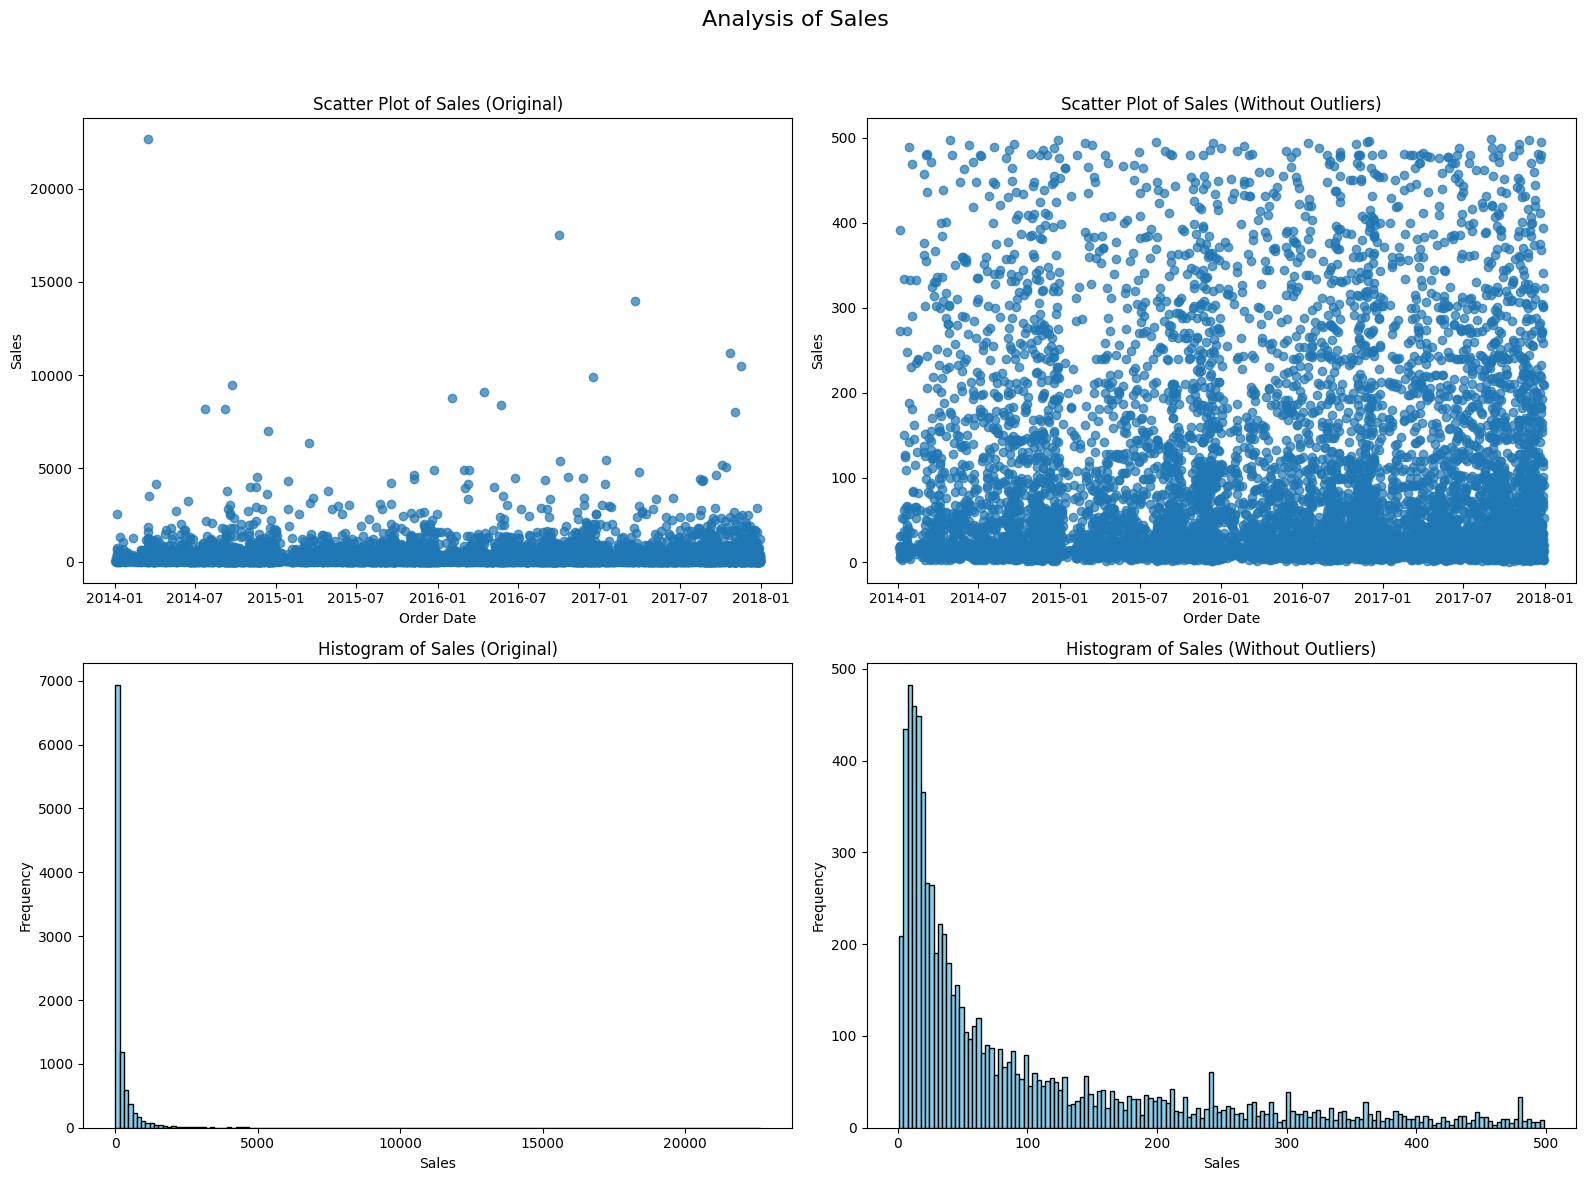

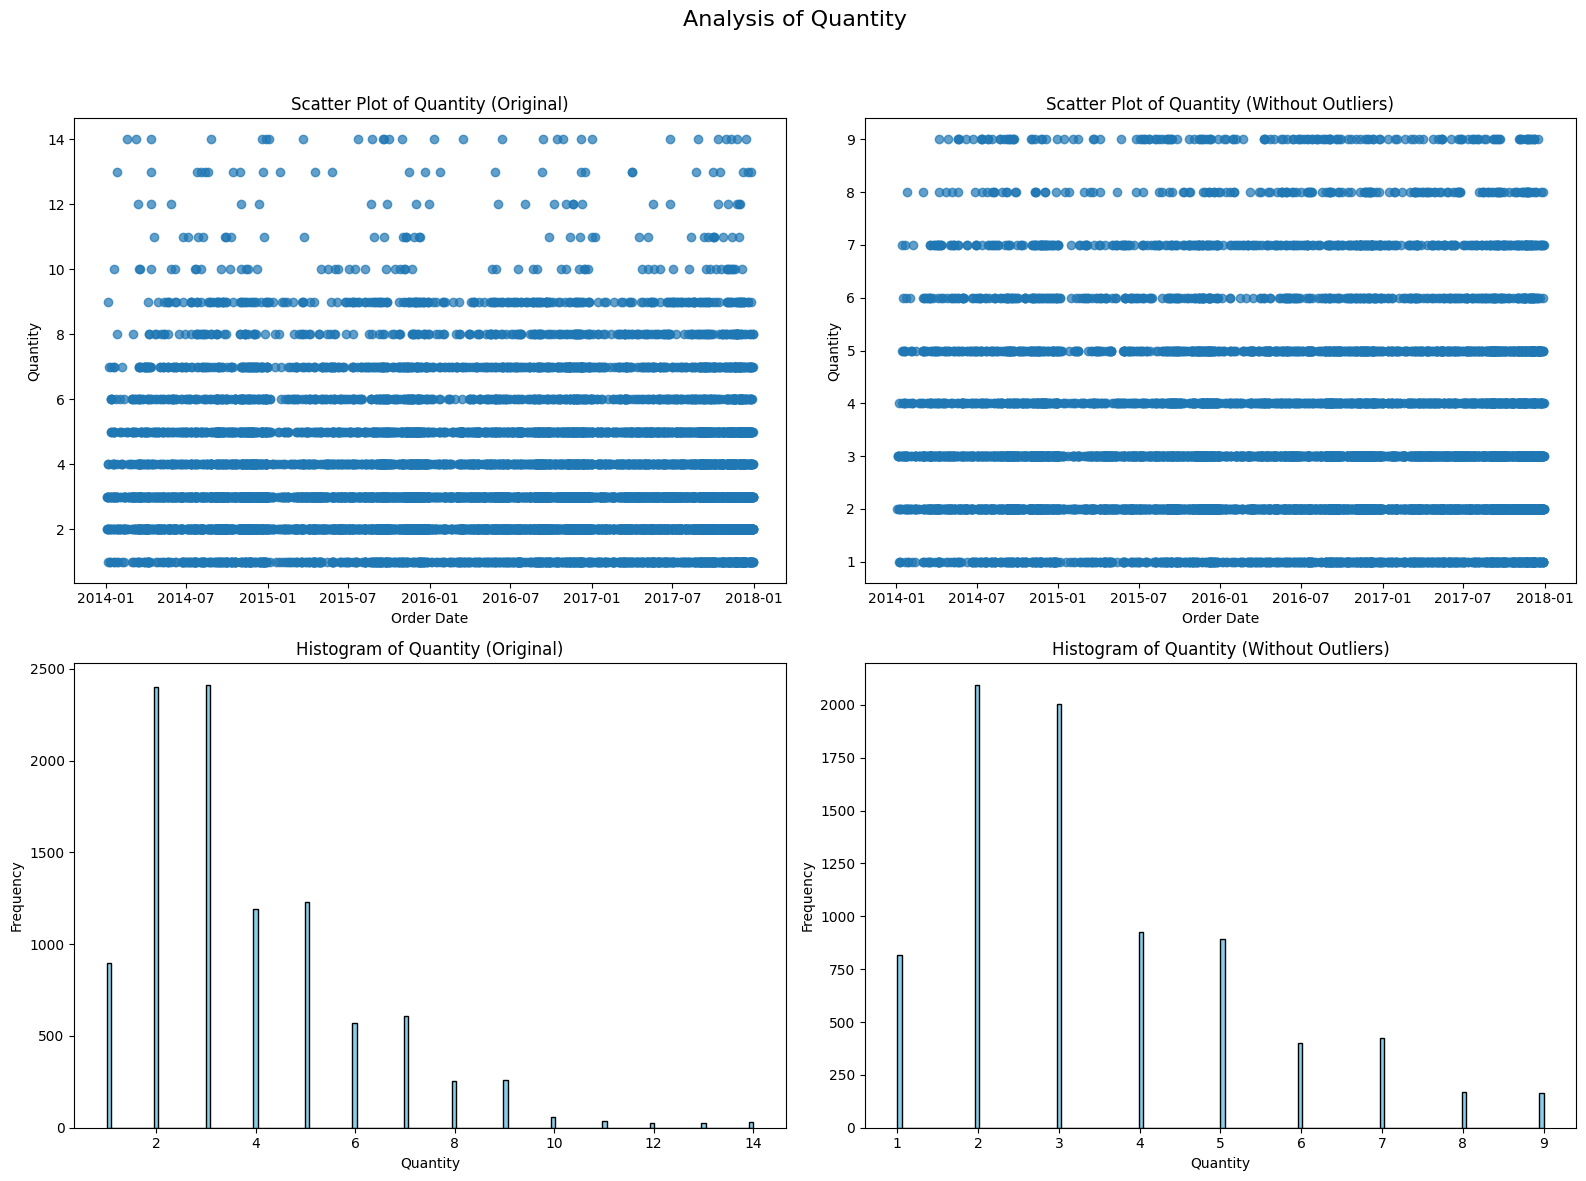

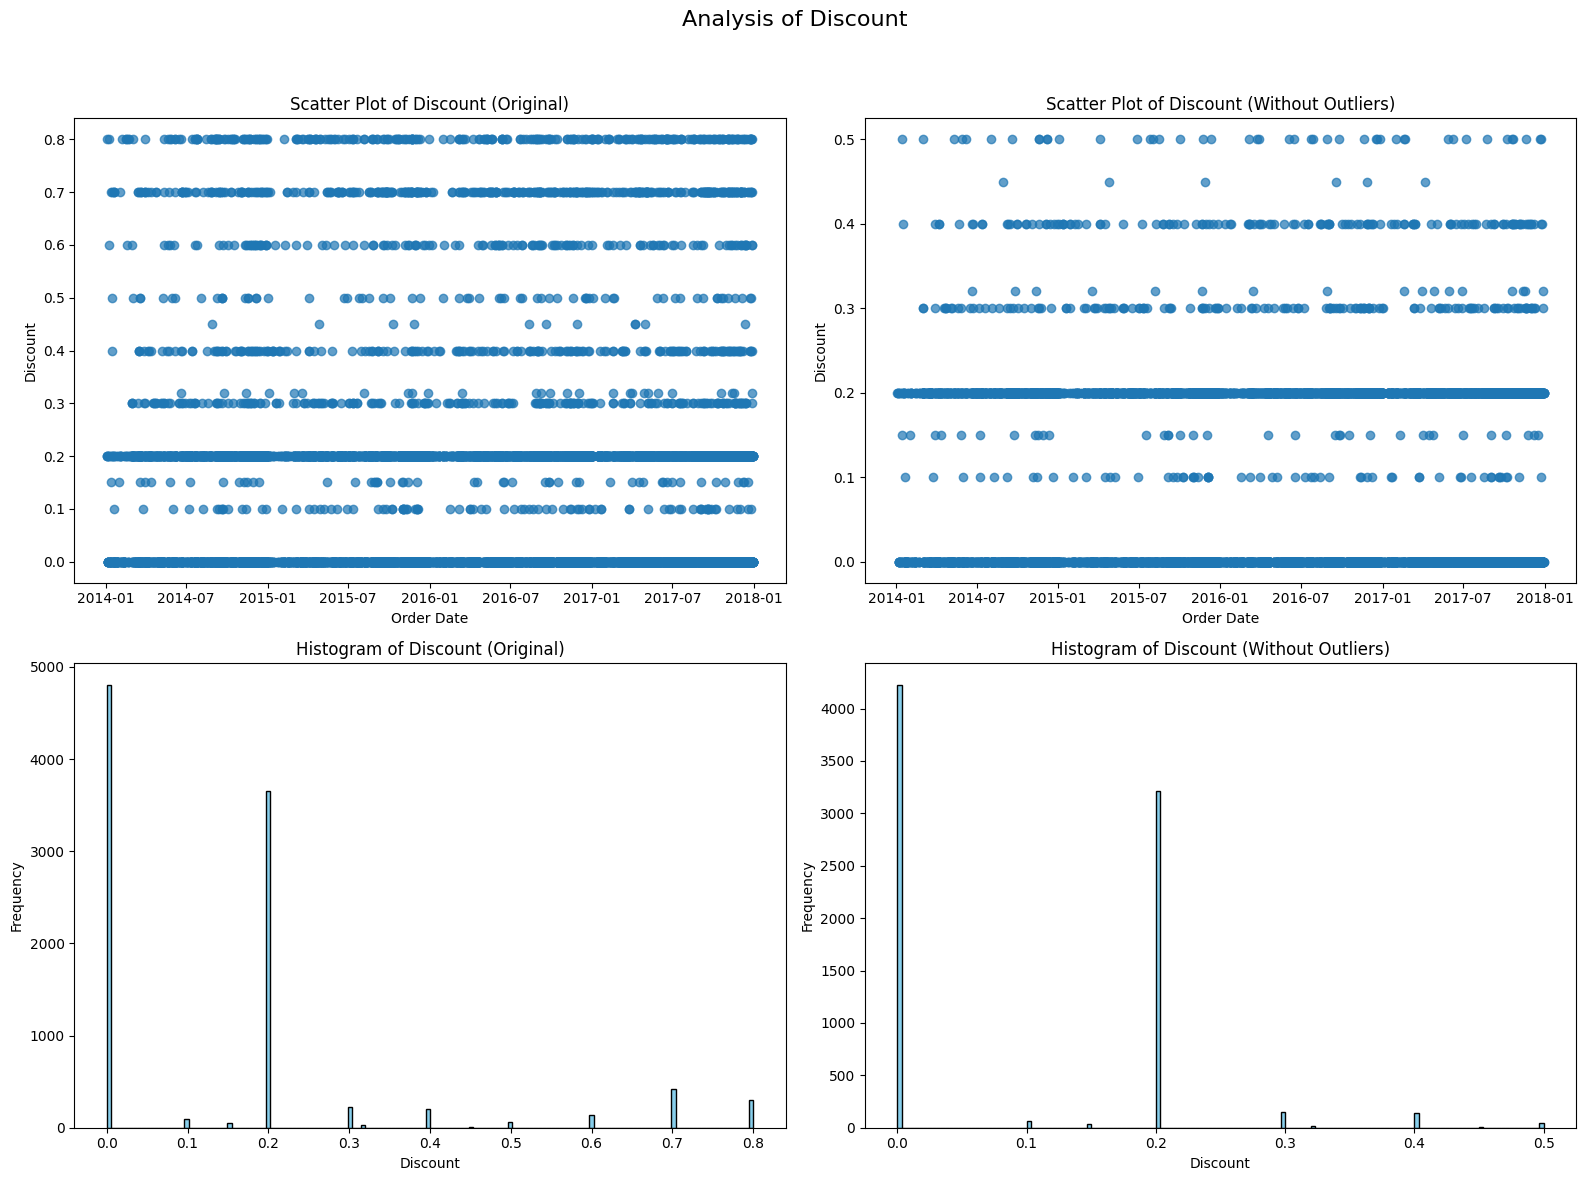

In [28]:
import matplotlib.pyplot as plt

# Lista de columnas numéricas
num_cols = ['Sales', 'Quantity', 'Discount']

# Iterar sobre cada columna en num_cols para crear una figura 2x2 por columna
for col in num_cols:
    # Crear una figura con una cuadrícula de 2x2
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Analysis of {col}', fontsize=16)
    
    # Gráfico de dispersión para el DataFrame original (con outliers)
    axes[0, 0].scatter(df['Order Date'], df[col], alpha=0.7)
    axes[0, 0].set_title(f'Scatter Plot of {col} (Original)')
    axes[0, 0].set_xlabel('Order Date')
    axes[0, 0].set_ylabel(col)
    
    # Gráfico de dispersión para el DataFrame sin outliers
    axes[0, 1].scatter(df_cleaned['Order Date'], df_cleaned[col], alpha=0.7)
    axes[0, 1].set_title(f'Scatter Plot of {col} (Without Outliers)')
    axes[0, 1].set_xlabel('Order Date')
    axes[0, 1].set_ylabel(col)
    
    # Histograma del DataFrame original
    axes[1, 0].hist(df[col], bins=150, color='skyblue', edgecolor='black')
    axes[1, 0].set_title(f'Histogram of {col} (Original)')
    axes[1, 0].set_xlabel(col)
    axes[1, 0].set_ylabel('Frequency')
    
    # Histograma del DataFrame sin outliers
    axes[1, 1].hist(df_cleaned[col], bins=150, color='skyblue', edgecolor='black')
    axes[1, 1].set_title(f'Histogram of {col} (Without Outliers)')
    axes[1, 1].set_xlabel(col)
    axes[1, 1].set_ylabel('Frequency')
    
    # Ajustar el espaciado entre los subgráficos
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deja espacio para el título principal
    plt.show()


### Visualización del Impacto de la Limpieza de Outliers

En esta sección, se presentan las visualizaciones antes y después de la limpieza de outliers. Al eliminar los valores atípicos, los datos están ahora más acotados dentro de un rango más representativo de la tendencia general, lo que contribuye significativamente a la **robustez** y **precisión** del modelo. Esta reducción de la variabilidad extrema permite que los algoritmos de modelado puedan identificar patrones de manera más consistente, mejorando así la confiabilidad y la efectividad de las predicciones derivadas de estos datos procesados.


## Elección del Modelo

Para seleccionar el modelo de predicción más adecuado, se evaluarán y compararán distintos algoritmos de machine learning. En esta selección se consideran los siguientes modelos:

- **Regresión Lineal**: Un modelo lineal sencillo y rápido para relaciones lineales entre variables.
- **Árbol de Decisión**: Útil para capturar relaciones no lineales y hacer interpretaciones más visuales.
- **Bosque Aleatorio (Random Forest)**: Combina múltiples árboles de decisión para mejorar la precisión y reducir el riesgo de sobreajuste.
- **Gradient Boosting**: Un modelo de boosting que corrige errores iterativamente, proporcionando mayor precisión en la predicción.

Cada modelo será evaluado mediante gráficos que muestren la comparación entre valores reales y valores predichos. Además, se analizarán métricas clave de rendimiento para cada modelo, entre ellas:

- **RMSE (Root Mean Squared Error)**: Mide la desviación promedio entre valores reales y predichos.
- **MAE (Mean Absolute Error)**: Calcula el error promedio absoluto de las predicciones.
- **R² (Coeficiente de Determinación)**: Indica el porcentaje de variabilidad explicada por el modelo en los datos.

Esta combinación de gráficos y métricas permitirá identificar el modelo que mejor se ajuste a los datos, maximizando precisión y robustez en las predicciones.


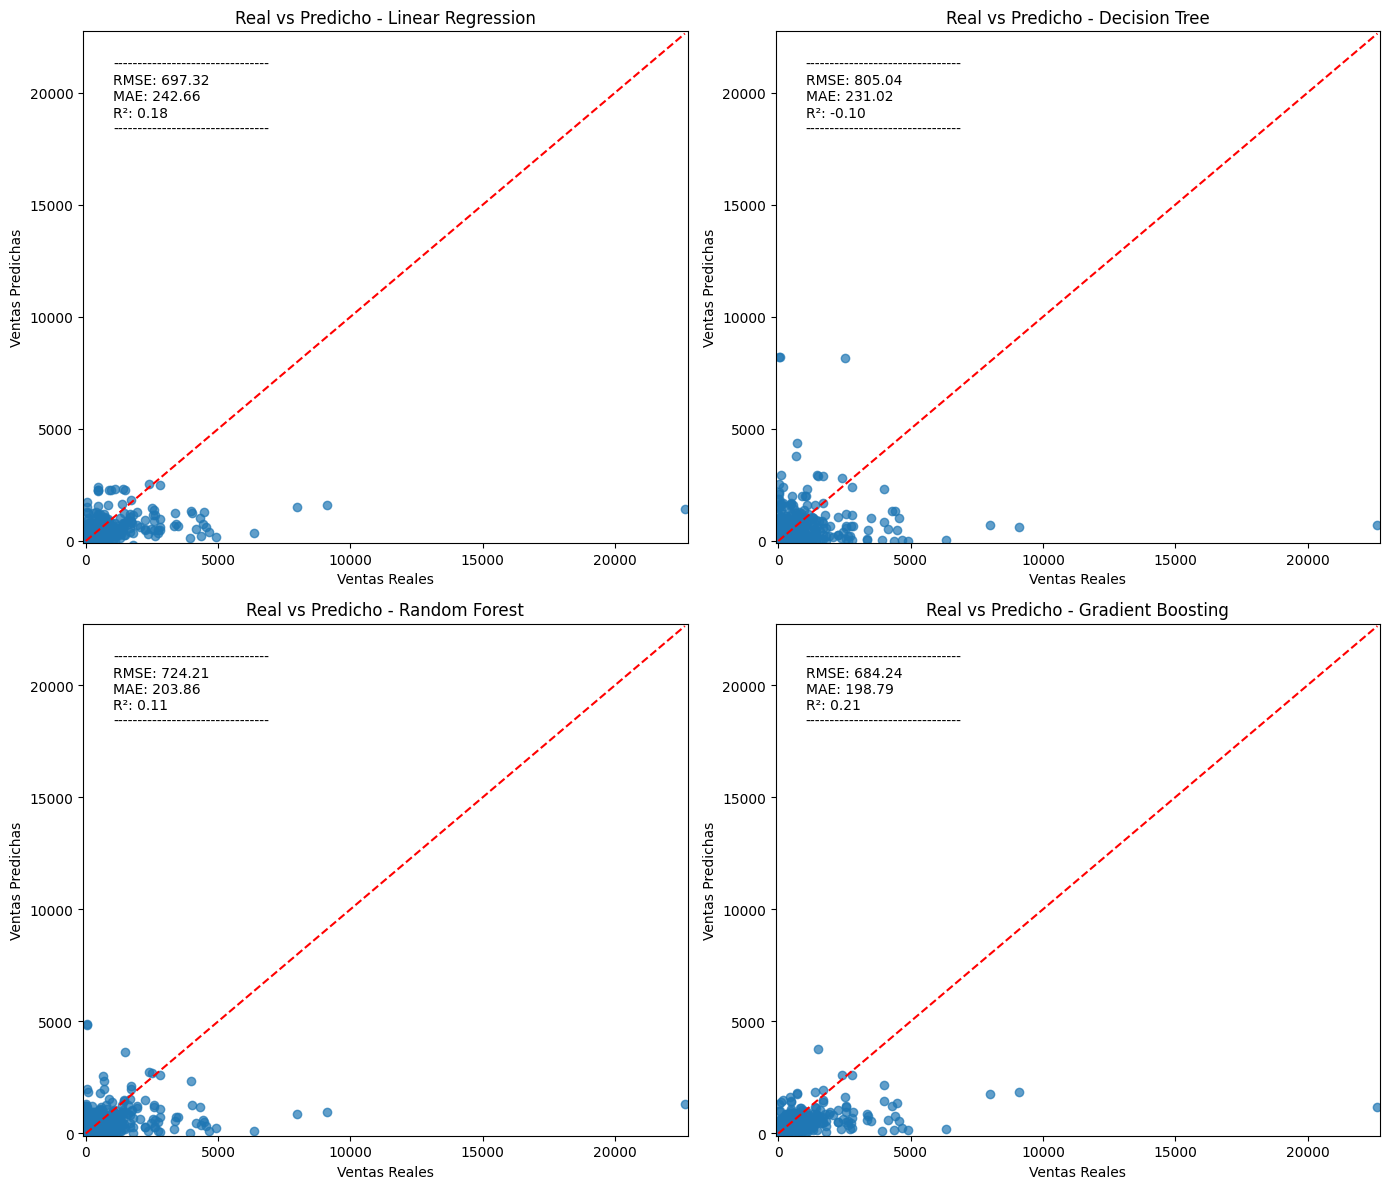

In [29]:
# Preprocesamiento
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


categorical_features = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']  # Convertir variables categóricas a variables dummies (One-Hot Encoding)
numerical_features = ['Quantity', 'Discount']

# Transformador para preprocesar
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Crear variables y objetivo (Sales)
X = df.drop(columns=['Sales', 'Order ID', 'Customer ID', 'Customer Name', 'Postal Code', 'Product ID', 'Product Name', 'Row ID', 'Profit'])
y = df['Sales']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear pipelines para los modelos
def create_model_pipeline(model):
    return Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

models = {
    'Linear Regression': create_model_pipeline(LinearRegression()),
    'Decision Tree': create_model_pipeline(DecisionTreeRegressor(random_state=42)),
    'Random Forest': create_model_pipeline(RandomForestRegressor(random_state=42)),
    'Gradient Boosting': create_model_pipeline(GradientBoostingRegressor(random_state=42))
}

# Crear un diccionario para almacenar todas las métricas de cada modelo
results = {}

# Crear una figura para los gráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # Dos filas y dos columnas
axes = axes.flatten()  # Aplana el array de ejes para fácil indexación

# Entrenar y evaluar los modelos
for ax, (model_name, model_pipeline) in zip(axes, models.items()):
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    
    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar las métricas en el diccionario de resultados
    results[model_name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }
    
    # Crear gráfico de Real vs. Predicho para cada modelo
    ax.scatter(y_test, y_pred, alpha=0.7)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    ax.set_title(f'Real vs Predicho - {model_name}')
    ax.set_xlabel('Ventas Reales')
    ax.set_ylabel('Ventas Predichas')
    ax.set_xlim(y_test.min() - 100, y_test.max() + 100)  # Ajustar límites del eje x
    ax.set_ylim(y_test.min() - 100, y_test.max() + 100)  # Ajustar límites del eje y
  

    # Añadir métricas en la esquina superior izquierda del gráfico
    metrics_text = (f"--------------------------------\n"
                    f"RMSE: {rmse:.2f}\n"
                    f"MAE: {mae:.2f}\n"
                    f"R²: {r2:.2f}\n"
                    f"--------------------------------")

    # Colocar el texto en la esquina superior izquierda
    ax.text(0.05, 0.95, metrics_text, ha='left', va='top', transform=ax.transAxes, fontsize=10)

# Ajustar el espacio entre los gráficos
plt.subplots_adjust(hspace=0.5)  # Aumentar espacio vertical entre filas

# Mostrar la figura
plt.tight_layout()
plt.show()


#### Con Outliers

1. **Regresión Lineal**
   - **RMSE**: 697.32, **MAE**: 242.66, **R²**: 0.18
   - La regresión lineal muestra un ajuste deficiente a los datos con outliers, con un RMSE y MAE altos y un R² bajo, lo cual indica que explica solo el 17% de la variabilidad.

2. **Árbol de Decisión**
   - **RMSE**: 805.04, **MAE**: 231.02, **R²**: -0.10
   - El árbol de decisión tiene el peor desempeño en este conjunto de datos, con un R² negativo que indica que su rendimiento es inferior a la media y que los outliers afectan fuertemente su precisión.

3. **Bosque Aleatorio**
   - **RMSE**: 742.21, **MAE**: 203.86, **R²**: 0.11
   - Aunque el RMSE y MAE del bosque aleatorio son un poco mejores que los del árbol de decisión, el R² cercano a cero sugiere que el modelo no capta la variabilidad de los datos.

4. **Gradient Boosting**
   - **RMSE**: 684.24, **MAE**: 198.79, **R²**: 0.21
   - Gradient Boosting muestra un rendimiento superior respecto a los otros modelos, aunque aún es bajo, con un R² de 0.18. Sin embargo, los valores de error indican que el modelo es moderadamente robusto ante outliers.

ValueError: A given column is not a column of the dataframe

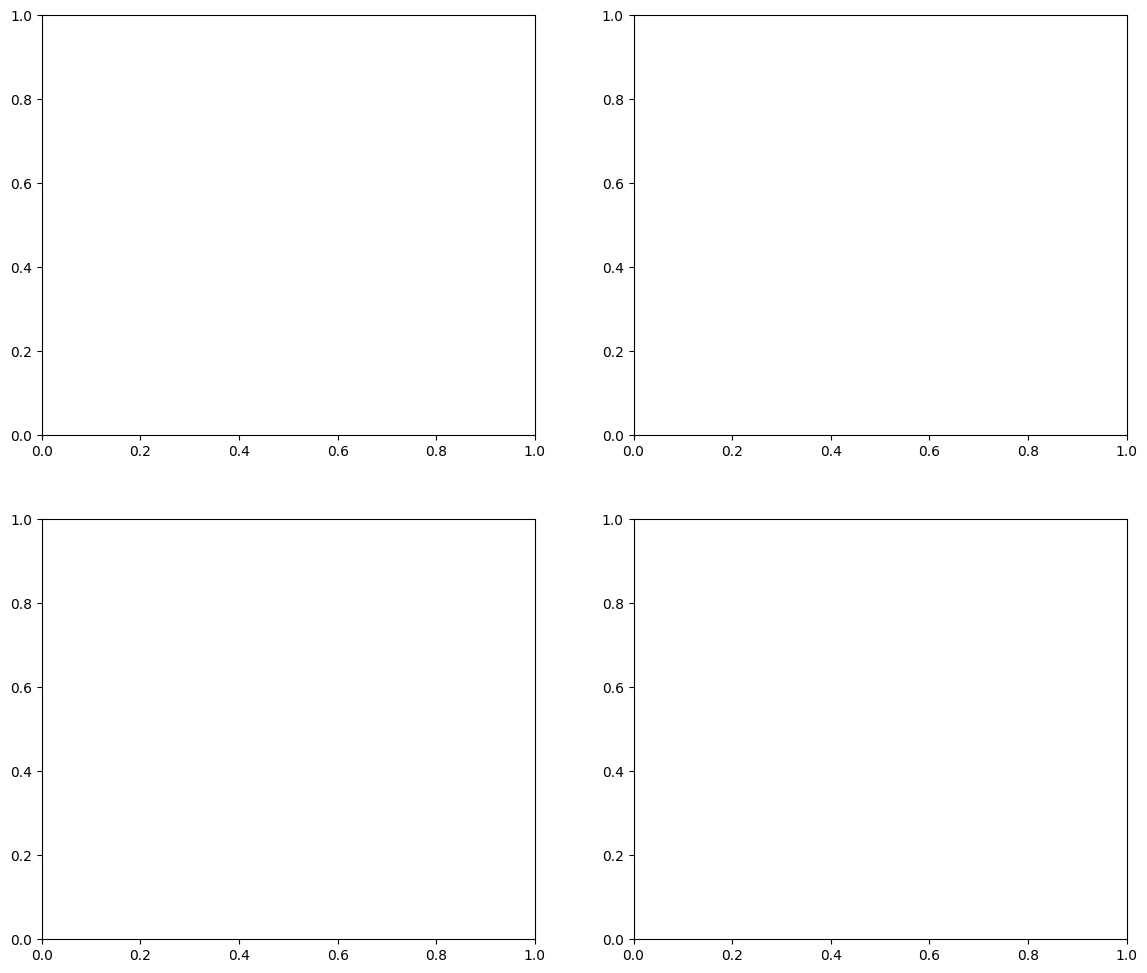

In [30]:
# Preprocesamiento
df_cleaned['Order Date'] = pd.to_datetime(df['Order Date'])
df_cleaned['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Convertir variables categóricas a variables dummies (One-Hot Encoding)
categorical_features = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Quarter']
numerical_features = ['Quantity', 'Discount']

# Transformador para preprocesar
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Crear variables y objetivo (Sales)
X = df_cleaned.drop(columns=['Sales', 'Order ID', 'Customer ID', 'Customer Name', 'Postal Code', 'Product ID', 'Product Name', 'Row ID', 'Profit'])
y = df_cleaned['Sales']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear pipelines para los modelos
def create_model_pipeline(model):
    return Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

models = {
    'Linear Regression': create_model_pipeline(LinearRegression()),
    'Decision Tree': create_model_pipeline(DecisionTreeRegressor(random_state=42)),
    'Random Forest': create_model_pipeline(RandomForestRegressor(random_state=42)),
    'Gradient Boosting': create_model_pipeline(GradientBoostingRegressor(random_state=42))
}

# Crear un diccionario para almacenar todas las métricas de cada modelo
results = {}

# Crear una figura para los gráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # Dos filas y dos columnas
axes = axes.flatten()  # Aplana el array de ejes para fácil indexación

# Entrenar y evaluar los modelos
for ax, (model_name, model_pipeline) in zip(axes, models.items()):
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    
    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar las métricas en el diccionario de resultados
    results[model_name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }
    
    # Crear gráfico de Real vs. Predicho para cada modelo
    ax.scatter(y_test, y_pred, alpha=0.7)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    ax.set_title(f'Real vs Predicho - {model_name}')
    ax.set_xlabel('Ventas Reales')
    ax.set_ylabel('Ventas Predichas')
    ax.set_xlim(y_test.min(), y_test.max())  # Ajustar límites del eje x
    ax.set_ylim(y_test.min(), y_test.max())  # Ajustar límites del eje y
  
    # Añadir métricas en la esquina superior izquierda del gráfico
    metrics_text = (f"--------------------------------\n"
                    f"RMSE: {rmse:.2f}\n"
                    f"MAE: {mae:.2f}\n"
                    f"R²: {r2:.2f}\n"
                    f"--------------------------------")

    # Colocar el texto en la esquina superior izquierda
    ax.text(0.05, 0.95, metrics_text, ha='left', va='top', transform=ax.transAxes, fontsize=10)

# Ajustar el espacio entre los gráficos
plt.subplots_adjust(hspace=0.5)  # Aumentar espacio vertical entre filas

# Mostrar la figura
plt.tight_layout()
plt.show()


#### Sin Outliers

1. **Regresión Lineal**
   - **RMSE**: 93.31, **MAE**: 66.72, **R²**: 0.37
   - La regresión lineal mejora en ausencia de outliers, mostrando una reducción considerable en el RMSE y MAE, y un aumento en R², lo que indica un ajuste mejor a los datos limpios.

2. **Árbol de Decisión**
   - **RMSE**: 120.28, **MAE**: 77.41, **R²**: -0.05
   - Aunque el árbol de decisión presenta cierta mejora en RMSE y MAE, su R² sigue siendo negativo, lo que indica que aún no captura bien la estructura de los datos.

3. **Bosque Aleatorio**
   - **RMSE**: 97.50, **MAE**: 62.82, **R²**: 0.31
   - Sin outliers, el bosque aleatorio muestra una mejora significativa en RMSE, MAE y R², lo que indica un mejor rendimiento y una mayor capacidad para modelar datos sin valores extremos.

4. **Gradient Boosting**
   - **RMSE**: 90.26, **MAE**: 63.71, **R²**: 0.41
   - Gradient Boosting obtiene el mejor rendimiento entre los modelos sin outliers, con el RMSE y MAE más bajos y el R² más alto (0.39), lo que indica que explica el 39% de la variabilidad.

### Conclusiones

- **Efecto de los Outliers**: Los outliers afectan notablemente el rendimiento de todos los modelos, particularmente en el árbol de decisión y bosque aleatorio, donde el R² es negativo en presencia de outliers.
- **Modelo Más Robusto sin Outliers**: Gradient Boosting y la Regresión Lineal son los modelos más efectivos después de eliminar los outliers, mostrando una mejora sustancial en todas las métricas.
- **Recomendación**: La limpieza de outliers resulta beneficiosa para mejorar la precisión de los modelos, especialmente en los modelos que tienden a sobreajustarse a valores extremos, como el árbol de decisión y el bosque aleatorio.

In [ ]:
# Establece umbrales deseados para cada métrica basados en los resultados sin outliers
thresholds = {
    'RMSE': 100,   # Basado en el rango observado de RMSE sin outliers
    'MAE': 70,     # Basado en el rango observado de MAE sin outliers
    'R²': 0.25     # Basado en el rango observado de R² sin outliers
}

# Filtrar los modelos que cumplen con los umbrales ajustados
filtered_models = {model: metrics for model, metrics in results.items()
                   if metrics['RMSE'] <= thresholds['RMSE'] and
                      metrics['MAE'] <= thresholds['MAE'] and
                      metrics['R²'] >= thresholds['R²']}

# Si hay modelos que cumplen con los umbrales, selecciona el mejor
if filtered_models:
    best_model_name = min(filtered_models, key=lambda k: filtered_models[k]['RMSE'])
    print(f"\nEl mejor modelo que cumple con los umbrales es: {best_model_name}")
else:
    print("\nNingún modelo cumple con todos los umbrales establecidos.")




El mejor modelo que cumple con los umbrales es: Gradient Boosting


## Selección del Mejor Modelo: Gradient Boosting

### Técnica de Filtrado Basada en Umbrales de Métricas

Para determinar el mejor modelo de predicción, se aplicó una **técnica de filtrado basada en umbrales** en tres métricas clave de desempeño:

- **RMSE (Root Mean Square Error)**: mide la magnitud promedio del error. El umbral se estableció en 100, considerando la variabilidad observada en los datos.
- **MAE (Mean Absolute Error)**: representa el error absoluto promedio y se fijó en 70, indicando el rango de precisión esperado en el modelo.
- **R² (Coeficiente de Determinación)**: refleja el nivel de ajuste del modelo a los datos, con un mínimo aceptable de 0.25.

Los modelos que no cumplían con estos umbrales fueron excluidos, y se seleccionó el modelo con el **menor RMSE** entre aquellos que sí cumplían, dado que un RMSE más bajo indica mayor precisión en las predicciones.

### Resultado: Modelo Gradient Boosting

El modelo que cumplió con todos los umbrales y presentó el menor error fue **Gradient Boosting**. Esta técnica de aprendizaje supervisado se destaca en escenarios con datos complejos y proporciona un balance entre precisión y resistencia a la variabilidad en los datos.

### Conclusión y Recomendación

La selección de **Gradient Boosting** como modelo de predicción sugiere que la empresa podrá beneficiarse de sus estimaciones precisas en ventas, obteniendo información que es fundamental para la toma de decisiones estratégicas en planificación y operaciones.

#### Recomendación:
Para maximizar el valor de las predicciones, se recomienda a la empresa **revisar periódicamente los datos para gestionar outliers**, los cuales pueden introducir variabilidad en los resultados. Asimismo, la compañía podría considerar ajustar los parámetros del modelo Gradient Boosting a medida que disponga de nuevos datos, para mejorar aún más la precisión y consistencia del modelo en el largo plazo.
